# Chapter #2: Data & Sampling Distribution

Based on Practical Statistics for Data Scientists

A proliferação de dados de qualidade e relevância distintos reinforça a necessidade de amostragem como uma ferramente para trabalhar eficientemente com uma variedade de dados e para minimizar bias.
Mesmo em um projeto de Big Data, modelos preditivos são tipicamente desenvolvidos e têm seu piloto com amostras

### RANDOM SAMPLING & SAMPLE BIAS

**Samples/Amostra**: É um subconjunto (subset) dos dados de um conjunto de dados maior.

**Random Sampling/Amostragem Aleatória** é o processo em que cada membro disponível de uma população tem chances iguais de serem escolhidos para a amostra em cada sorteio. O resultado de uma random sampling é uma amostra aleatória simples (simple random sample).

A amostragem pode ser feita ou não com replacement.

**A qualidade dos dados frequentemente importa mais do que a quantidade de dados quando se faz uma estimativa ou modeo baseado em uma amostra**

#### KEY TERMS FOR DATA SAMPLING
- **Sample**: É um subset de um dataset maior
- **Population**: É o dataset maior ou a ideia deste dataset
- **N/n**: Tamanho da população / Tamanho da amostra
- **Random Sampling**: Sorteio aleatório de elementos para uma amostra 
- **Stratified Sampling**: Divisão da população em stratas. Amostragem aleatória dos elementos de cada strata.
- **Stratum/Strata**: Subgrupo homogêneo de uma população com características comuns.
- **Simple random sample**: A amostra resultante de uma amostragem aleatória sem estratificação da população.
- **Bias**: Erro sistemático
- **Sample bias**: Amostra que falha em representar a população.

##### Sample Bias
Dificilmente uma amostra representará exatamente a sua população. O sample bias ocorre quando essa diferença é significativa e pode se esperar de que continue para outras amostrar sorteadas da mesma forma que a primeira.

**Self-selection sampling bias** é um exemplo comum de sample bias.

##### Bias
Refere-se aos erros de medição ou amostragem que são sistemáticos e produzidos pelo processo de medição e amostragem.

Um processo unbiased também produzirá erro, mas é aleatório e não tende fortemente em nenhuma direção. Um biased process possui random error (erro aleatório), mas também bias.

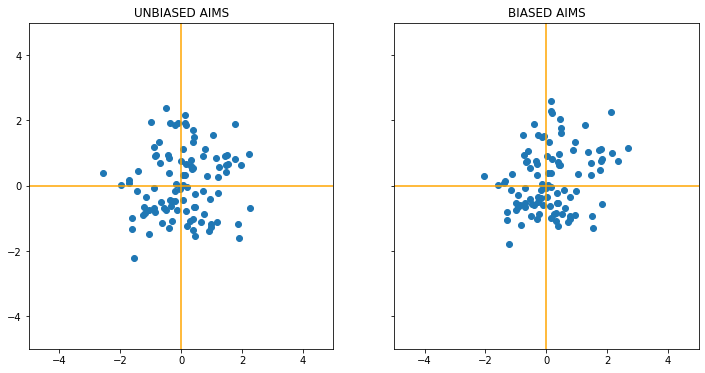

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 100
b = .2

points_x = np.random.normal(0, 1, n)
points_y = np.random.normal(0, 1, n)

unbiased_x = points_x
unbiased_y = points_y

biased_x, biased_y = zip(*[(x * (1+b), y * (1+b)) if (x >= 0 and y >= 0)
                      else (x * (1-b), y * (1-b))
                      for x, y in zip(points_x, points_y)])


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))

ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)

ax1.scatter(unbiased_x, unbiased_y)
ax1.axvline(0, color="orange"), ax1.axhline(0, color="orange")
ax1.set_title("Unbiased aims".upper())

ax2.scatter(biased_x, biased_y)
ax2.axvline(0, color="orange"), ax2.axhline(0, color="orange")
ax2.set_title("Biased aims".upper());

#### Random Selection
Existe um leque de métodos de amostragem, mas no coração de todos eles está o random sampling.

#### Size vs Quality: When does size matter?
Tempo e esforço gasto na amostragem aleatória não apenas reduz o bias, mas tabmém permite maior atenção ao EDA e à qualidade dos dados. O cenário clássico para o Big Data é quando os dados não são apenas volumoso, mas também escasso.

#### KEY IDEAS
- Mesmo na era do big data, amostragem aleatória continua sendo um ponto importante.
- O bias ocorre quando medidas ou observações estão sistematicamente com erro porque não são representativas de toda a população
- A qualidade dos dados é frequentemente mais importante que a quantidade, random sampling pode reduzir o bias e facilitar a melhoria da qualidade que, sem ela, seria muito custoso.


### SELECTION BIAS
Refere-se a seleção de dados de uma forma que leva a uma conclusão enganosa ou efêmera.

#### KEY TERMS FOR SELECTION BIAS
- **Selection Bias**: Bias resultante da forma em que observações são selecionadas.
- **Data Snooping**: Caça extensiva nos dados em busca de algo interessante.
- **Vast Search Effect**: Bias ou non-reproducibility resultante de repetidas modelagem de dados or modelagem de dados com grande número de variáveis preditoras.

#### Regression to the Mean
Refere-se ao fenômeno envolvendo medidas sucessivas de uma variável. Valores extremos tendem a ser seguidos de valores mais ao próximos às medidas centrais. 
Dar foco especial e significado aos valores extremos pode levar a uma forma de selecion bias.

#### KEY IDEAS
- Especificar a hipótese e coletar dados seguindo randomização e princípios de random samplings é uma prevenção contra bias.
- Todas as outras formas de análise de dados corre o risco de bias. Resultante da coleta de dados ou processo de análise.

### SAMPLE DISTRIBUTION OF A STATISTIC
O termo sampling distribution de uma estatística se refere à distribuição de alguma estatística de amostra em muitas amostras sorteadas de uma mesma população.

#### KEY TERMS FOR SAMPLE DISTRIBUTION
- **Sample Statistic**: Uma métrica calculada para a amostra de dados.
- **Data Distribution**: É a distribuição da frequência de valores individuais de um dataset.
- **Sampling Distribution**: É a distribuição da sample statistica de muitas amostragens ou re-amostragens.
- **Central Limit Theorem**: É a tendência de uma samplings distribution tomar uma forma normal a medida que o tamanho da sample aumenta.
- **Standard Error**: É a "standard deviation" de uma sample statistic de muitas amostragens (não confunda com standard deviation).

Usualmente, uma amostra é sorteada com o objetivo de:

- Medir alguma coisa (com uma sample statistic)
- Modelar alguma coisa (comum modelo estatístico ou de Machine Learning)

Como nossa estimativa ou modelo é baseado em uma amostra, ele pode conter erro, ou seja, nossa estimativa ou modelo pode ser diferente se sorteássemos uma amostra diferente. Nós estamos interessados em quão diferente eles serão (samplings variability). Se tivermos muitos dados, podemos sortear amostras adicionais e observar a distribuição de uma sample statistic. Tipicamente, nós vamos calcular nossa estimativa ou modelo usando o máximo de dados facilmente disponíveis então a opção de sortear amostras adicionais da população não está disponível.


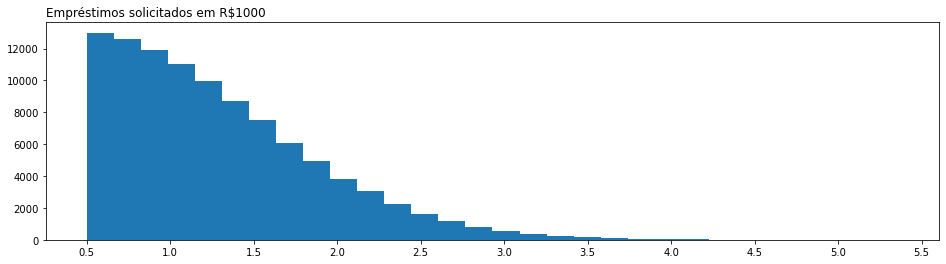

In [2]:
from scipy.stats import skewnorm
import pandas as pd
import seaborn as sns

N = 100_000
population = pd.Series(np.abs(skewnorm.rvs(40, size=N)) + 0.5)

plt.figure(figsize=(16, 4))

plt.hist(population, bins=30)
plt.title("Empréstimos solicitados em R$1000", loc="left")

plt.xticks(np.arange(0.5, 6, .5), np.arange(0.5, 6, .5));

In [3]:
sample_data = pd.Series(population.sample(1000))
sample_mean_05 = pd.Series([population.sample(5).mean() for _ in range(1000)])
sample_mean_20 = pd.Series([population.sample(20).mean() for _ in range(1000)])
sample_median_20 = pd.Series([population.sample(20).median() for _ in range(1000)])
sample_median_1000 = pd.Series([population.sample(1000).median() for _ in range(1000)])

results = pd.DataFrame({
    "sample_values": sample_data.reset_index(drop=True),
    "sample_mean_05": sample_mean_05.reset_index(drop=True),
    "sample_mean_20": sample_mean_20.reset_index(drop=True)
})


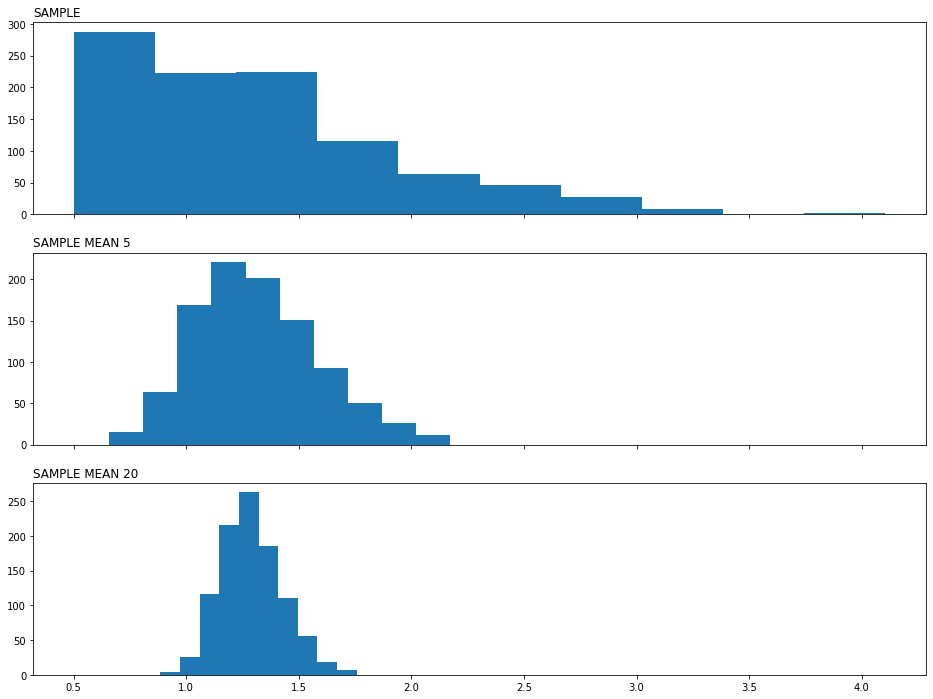

In [4]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 12))

titles = ["Sample", "Sample Mean 5", "Sample Mean 20"]

for column, axi, title in zip(results.columns, axs, titles):
    axi.hist(results[column])
    axi.set_title(title.upper(), loc="left");

In [6]:
print("{:<35}{:<25}\n{:<35}{:<25}\n{:<35}{:<25}\n{:<35}{:<25}".format(
    "Média da População:", np.round(population.mean(), 3),
    "Média da Amostra:", np.round(sample_data.mean(), 3),
    "Média da Samp. Distrib. 5", np.round(sample_mean_05.mean(), 3),
    "Média da Samp. Distrib. 20", np.round(sample_mean_20.mean(), 3),
))

Média da População:                1.295                    
Média da Amostra:                  1.298                    
Média da Samp. Distrib. 5          1.316                    
Média da Samp. Distrib. 20         1.289                    


#### Teorema do Limite Central
O fenômeno acima é chamado de Central Limit Theorem e diz que as sample statistics de múltiplas amostragens assemelham-se à curva normal, mesmo que a população não seja distribuída com a curva normal, dado que o tamanho da amostra é grande o suficiente. 

O teorema permite que métodos estatísticos e probabilísticos que funcionam para distribuições normais possam ser aplicados a muitos problemas com outros tipos de distribuição.

**Obs**: O teorema recebe muita atenção na estatística tradicional e os cientistas de dados devem conhecê-lo, porém, como testes de hipóteses formais e intervalos de confiança não são tão presentes na ciência de dados e o **bootstrap** está disponível em qualquer caso, o teorema não é tão central na prática da ciência de dados.

#### Standard Error
O standard error é uma métrica que soma a variabilidade da sampling distribution. O standard error pode ser estimado usando uma estatística baseada na standard deviation (s) dos valores da amostra e o tamanho da amostra (n).

$$SE=\LARGE\frac{s}{\sqrt{n}}$$


Veja que a medida que o tamanho da amostra aumenta, o standard erro diminui.

#### KEY IDEAS
- A distribuição da frequência de uma sample statistic nos fala como uma métrica seria diferente de amostra em amostra.
- A sampling distribution pode ser estimada via bootstrap, ou via formulas que se baseiam no teorema de limite central.
- Uma métrica que soma a variabilidade da sample statistic é o standard error.

### THE BOOTSTRAP
Uma maneira fácil e efetiva de estimar a sampling distribution de uma estatística, ou de parâmetros de um modelo, é sortear amostras adicionais com substituição da própria amostra e recalcular a estatística ou modelo para cada re-amostragem.

#### KEY TERMS FOR BOOTSTRAP
- **Bootstrap Sample**: Uma amostra tomada com substituição.
- **Resampling**: O processo de tomar repetidas amostras dos dados. Inclui procedimentos de bootstrap e permutação.

O algorítmo para o boostrap da média, para uma amostra de tamanho **n**, é o seguinte:
1. Retire um valor, anote, e devolva o valor.
2. Repita **n** vezes.
3. Anote a média dos valores "reamostrados".
4. Repita os passos 1-3 **R** vezes.
5. Use os **R** resultados para:
    - Calcular seu desvio padrão (estimativa do standard error da média da amostra)
    - Produzir um histograma ou boxplot.
    - Achar um intervalo de confiança

R é o número de iterações do bootsrap e é definido arbitrariamente. Quanto mais iterações você faz, mais acurada é a estimativa do standard error ou do intervalo de confiança. O resultado desse procedimento é um conjunto boostrap de sample statistics ou parâmetros estimados de um modelo.

In [8]:
from sklearn.utils import resample

R = 1000

results = []
for _ in range(R):
    bootstrap_sample = resample(sample_data)
    results.append(bootstrap_sample.median())

results = pd.Series(results)

print("Bootstrap Statistics:".upper())
print("original:      {}".format(np.round(population.median(), 4)))
print("bootstrap:     {}".format(np.round(results.mean(), 4)))
print("bias:          {}".format(np.round(results.mean() - population.median(), 4)))
print("std. error:    {}".format(np.round(results.std(), 4)))

BOOTSTRAP STATISTICS:
original:      1.1722
bootstrap:     1.1989
bias:          0.0267
std. error:    0.0282


O bootstrap pode ser usado em dados de múltiplas variáveis, onde as linhas serão escolhidas como unidades.

Um modelo pode ser executado sobre dados bootstrap para estimar, por exemplo, a variabilidade dos parâmetros de um modelo, ou para melhorar o poder preditivo.

O bootstap pode ser usado para determinar o tamanho da amostra, experimentar diferentes valores de n para ver como a sampling distribution é afetada.

#### WARNING
O bootstrap não compensa para uma amostra pequena, pois não cria novos dados, nem preenche buracos no conjunto existente. Ele meramente informa sobre como várias amostras adicionais se comportariam quando sorteados da população.

#### KEY IDEAS
- O bootstrap é uma ferramenta poderosa para analisar a variabilidade de uma sample statistic.
- O bootstrap pode ser aplicado de forma similar para circunstâncias variadas, sem o estudo extensivo de aproximações matemáticas para sampling distributions.
- O bootstrap nos permite estimar sampling distributions para estatísticas em que nenhuma aproximação matemática foi desenvolvida.
- Quando aplicado a modelos preditivos, agregar múltiplas predições de amostras bootstrap supera o uso de um único modelo.


### CONFIDENCE INTERVAL
Tabelas de frequência, histogramas, boxplots e standard errors são todos formas de entender o erro potencial em uma estimativa da amostra. Intervalo de confiança é mais uma forma.

#### KEY TERMS FOR BOOTSTRAP
- **Confidence level**: É a porcentagem do intervalo de confiança, construído da mesma forma da mesma população, que se espera conter a estatística de interesse.
- **Interval Endpoints**: Os valores mais alto e mais baixo do intervalo de confiança.

**Não devemos colocar fé em uma estimativa quando é apresentada através de um único número. O intervalo de confiança vai contra a tendência de apresentar uma estimativa pontual e a apresenta em um intervalo.** 

Uma maneira de pensar em um intervalo de confiança de 90% é o intervalo que incluir 90% da parte central de uma bootstrap sampling distribution.

Um intervalo de confiança de x% ao redor da sample statistic deve, em média, conter sample statistics similares em x% do tempo.

O algoritmo ara um bootstrap confidence interval é:
1. Sorteie uma amostra aleatória de tamanho **n** com substituição da amostra.
2. Anote a estatística de interesse.
3. Repita os passos 1-2 R vezes
4. Para um intervalo de confiança de x%, apare [(100-x)/2]% dos R resultados de ambos os lados da distribuição.
5. Os pontos aparados são os endpoints de um boostrap confidence interval de x%

Bootstrap sample distribution confidence interval endpoints: [1.14953991 1.24057367]
Traditional sample distribution confidence interval endpoints: [1.13390853 1.21326406]


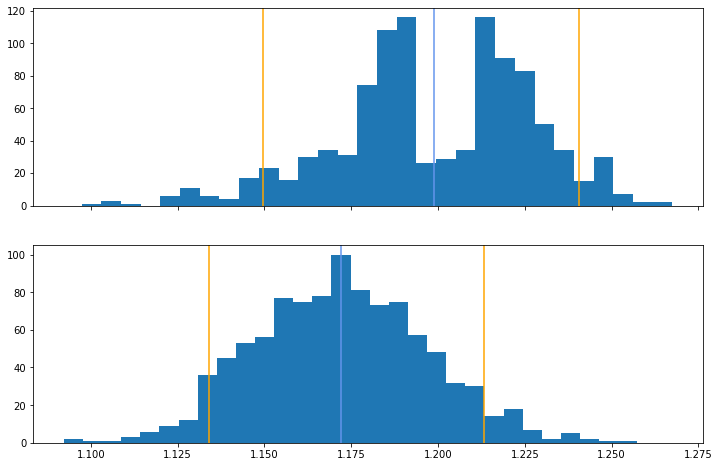

In [9]:
# Obtendo o intervalo de confiança de 90% do bootstrap sampling distribution anterior
endpoints_bsd = np.quantile(results, [0.05, 0.95])
endpoints_sd = np.quantile(sample_median_1000, [0.05, 0.95])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.hist(results, bins=30)
ax2.hist(sample_median_1000, bins=30)

ax1.axvline(endpoints_bsd[0], color="orange")
ax1.axvline(endpoints_bsd[1], color="orange")

ax2.axvline(endpoints_sd[0], color="orange")
ax2.axvline(endpoints_sd[1], color="orange")

ax1.axvline(results.mean(), color="cornflowerblue")
ax2.axvline(sample_median_1000.mean(), color="cornflowerblue")


print("Bootstrap sample distribution confidence interval endpoints:", endpoints_bsd)
print("Traditional sample distribution confidence interval endpoints:", endpoints_sd)

Um intervalo de confiança não da a probabilidade de algo ser verdadeiro sobre a população, isso envolve cálculos mais complexos e pontos que não se dá para calcular.

O intervalo de confiança responde à pergunta: "Dados um procedimento de amostragem e uma população, a probabilidade da estimativa da amostra estar no intervalo [ep0, ep1] é de x%.

#### KEY IDEAS
- Confidence intervals são típicos para apresentar estimativas como intervalos.
- Quanto mais dados tivermos em nossas amostras, menos variável a estimativa da amostra será.
- Quanto menor o confidence level, mais estreito o intervalo de confiança será.
- O bootstrap pode ser usado e é efetivo para construir intervalos de confiança.


C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


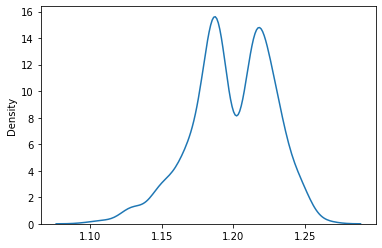

In [10]:
sns.distplot(results, kde=True, hist=False, norm_hist=True);

### NORMAL DISTRIBUTION
Também chamada de Gaussian distribution

In [9]:
pd.DataFrame({
    "interval": ["-1std <= x <= +1std", "-2std <= x <= +2std", "-3std <= x <= +3std"],
    "probabilidade": ["68%", "95%", "99.7%"],
    
})

,interval,probabilidade
0,-1std <= x <= +1std,68%
1,-2std <= x <= +2std,95%
2,-3std <= x <= +3std,99.7%


C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


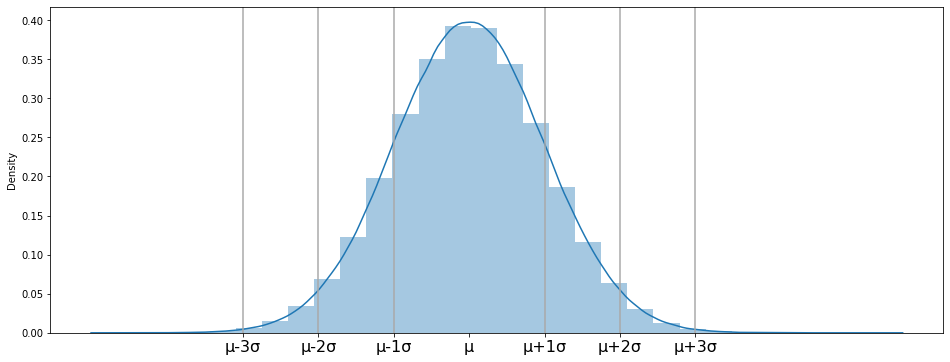

In [10]:
plt.figure(figsize=(16, 6))
sns.distplot(np.random.normal(0, 1, size=1_000_000), bins=30)
[plt.axvline(x, color="darkgrey") for x in [1, 2, 3, -1, -2, -3]]
plt.xticks(np.arange(-3, 3+1, 1), ['µ-3σ', 'µ-2σ', 'µ-1σ', 'µ', 'µ+1σ', 'µ+2σ', 'µ+3σ'], fontsize=16);

#### KEY TERMS FOR NORMAL DISTRIBUTION
- **Error**: A diferença entre um valor pontuar e o valor médio (ou o valor predicted).
- **Standardize/Padronizar**: Subtrair um valor da média e dividi-lo pelo desvio padrão.
- **z-score**: O resultado de uma padronização.
- **Standard Normal**: Uma distribuição normal com média 0 e std=1
- **QQ-Plot**: Verifica quão próximo uma sample distribution é de uma distribuição normal.

A maioria das variáveis não têm distribuição normal. A utilidade da distribuição normal vem do fato de que a maioria das sampling distributions são normalmente distribuídas.

#### Standard Normal e QQ-Plots
Uma distribuição normal padrão é aquela em que os valores são expressados em termos do desvio padrão da média. Para isso, os valores devem ser normalizados (ou padronizados) e transformados em z-score.

$$z_{score}=\LARGE\frac{x_i - \bar{x}}{s}$$

A standard normal distribution pode ser chamada de z-distribution.

O QQ-plot é usado para visualizar quão próxima uma amostra está de uma distribuição normal. (Outras formas: Histogram, KDE, Shapiro-Wilk test, Kolmogorov-Smironv test)

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


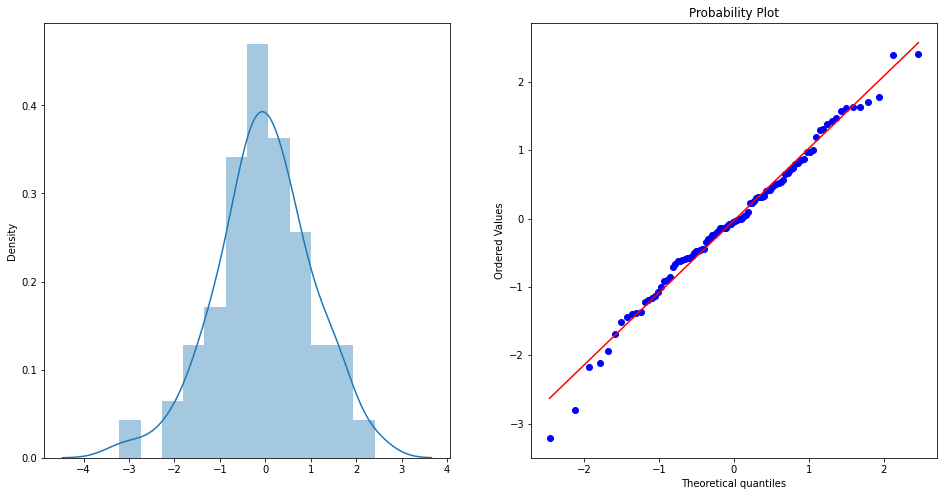

In [11]:
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

norm_sample = np.random.normal(size=100)
sns.distplot(norm_sample, ax=ax1)

stats.probplot(norm_sample, plot=ax2);

#### KEY IDEAS
- Em geral, variáveis não têm distribuição normal, mas erros, médias e totais frequentemente são.
- Normalizar ou padronizar os dados não os torna distribuídos normalmente, mas os coloca na mesma escala de uma distribuição normal padrão, ou z-distribution.

### LONG-TAILED DISTRIBUTIONS
#### KEY TERMS FOR LONG-TAILED DISTRIBUTIONS
- **Tail/Cauda**: A porção longa da distribuição de frequência onde valores extremos ocorrem em frequência mais baixa.
- **Skew**: Onde uma cauda da distribuição é maior que a outra.

Enquanto a distribuição normalmente é frequentemente apropriada e útil a respeito da distribuição de erros e sample statistics, ela tipicamente não caracteriza a distribuição de raw data.

A cauda longa não é presente apenas em distribuições assimétricas, como a enviesada para direita ou esquerda, ela também ocorre em distribuições simétricas.

A teoria cisne negro diz que um evento anômalo é muito mais provável de ocorrer do que previsto na distribuição normal.

In [12]:
nflx = pd.read_csv("../../data/NFLX.csv", sep=",", 
                   parse_dates=["Date"], 
                   date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d")
                  ).sort_values(by="Date")

nflx["close_var"] = nflx["Adj Close"].shift(-1) - nflx["Adj Close"]
nflx["norm_cl_var"] = (nflx["close_var"] - nflx["close_var"].mean()) / nflx["close_var"].std()

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


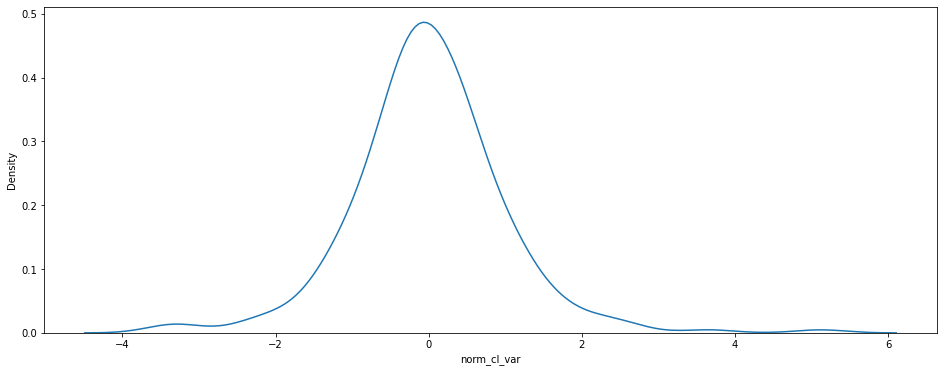

In [13]:
plt.figure(figsize=(16, 6))
sns.distplot(nflx.norm_cl_var.dropna(), hist=False, kde=True);

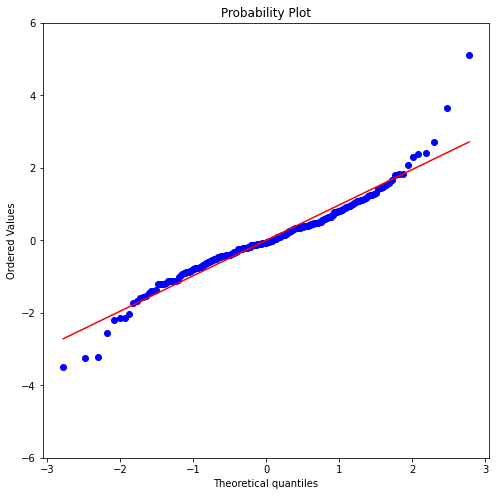

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
stats.probplot(nflx.norm_cl_var.dropna(), plot=ax)
plt.yticks(np.arange(-6, 6+1, 2));

Esse é um exemplo do fenômeno "normal in the middle", mas com caudas muito mais longas que a distribuição normal.

#### KEY IDEA
- Assumir uma distribuição como normal pode levar uma subestimação de eventos extremos ("black swans").

### STUDENT'S T-DISTRIBUTION
Trata-se de uma distribuição simétrica semelhante à normal padrão, porém com caudas mais grossas. Sendo assim, a simulação de uma distribuição t de Student pode gerar valores mais extremos que uma simulação da normal.

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

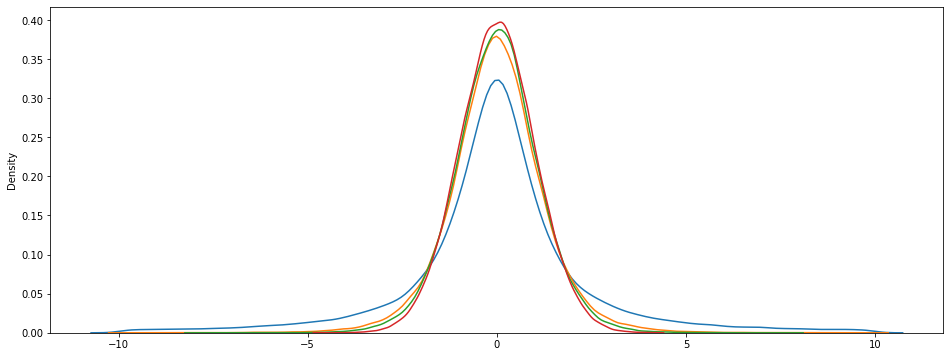

In [15]:
plt.figure(figsize=(16, 6))

degrees_of_freedom = [1, 5, 10, 100]
for df in degrees_of_freedom:
    t = np.random.standard_t(df=df, size=100_000)
    t = t[(t>=-10) & (t<=10)]
    sns.distplot(t, hist=False, label=df)

É usada extensivamente se tratando de sample distributions. Existe uma família de distribuições-t que diferem dependendo de quão grande é a amostra. Quanto maior a amostra, mais próximo à curva normal será a distribuição t de Student.

#### KEY TERMS FOR STUDENT'S T-DISTRIBUTION
- **n**: Tamanho da amostra
- **Degrees of freedom**: Parâmetro que permite que a distribuição t se ajuste aos diferentes tamanhos de amostras e estatísticas.

Várias estatísticas podem ser comparadas, após normalização, à distribuição t a fim de estimar intervalos de confiança.

Considere uma amostra de tamanho n para a qual a média $\bar{x}$ foi calculada. Se s é o desvio padrão da amostra, um intervalo de confiança de 90% ao redor da média é dado por:

$$\LARGE{endpoints =  \bar{x} ∓ t_{n-1}(0.05)\frac{s}{\sqrt{n}}}$$

Onde $t_{n-1}(0.05)$ é o valor da t-statistic com n-1 degrees of freedom, aparando 5% da distribuição t em ambos os extremos.

Cientistas de dados não usam tanto a distribuição t como a estatística inferencial clássica, pois bootstrap samplings podem responder a maioria das perguntas sobre sampling error (variação).

#### KEY IDEAS
- A distribuição-t é uma família de distribuições parecidas com a distribuição normal, mas com caudas mais grosssas.
- A distribuição t é amplamente utilizada como referência base para a distribuição de sample statistics, diferenças entre duas sample statistics, parâmetros de regressão e mais.

### BINOMIAL DISTRIBUTION
A distribuição binomial, ou distribuição de Bernoullli, é uma distribuição de probabilidade discreta para a obtenção de exatos **k** sucessos dentre **n** tentativas com probabilidade **p** de sucesso especificada em cada trial.
#### KEY TERMS FOR BINOMIAL DISTRIBUTION
- **Trial**: Um evento com um resultado discreto. (Rolar dados)
- **Success**: Resultado de interesse de um trial.
- **Binomial**: Dois possíveis resultados.
- **Binomial Trials**: Trial com dois possíveis resultados.
- **Binomial Distribution**: Distribuição do número de sucessos em x trials.

A distribuição binomial responder perguntas como: 

"*Se a probabilidade de um click gerar conversão é 0.02, qual a probabilidade de se observar 0 vendas em 200 clicks?*"

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1.76 %
62.88 %


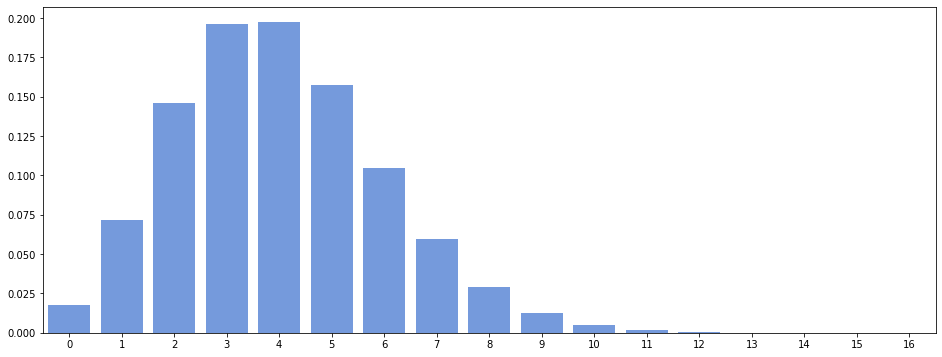

In [16]:
binom_values = pd.Series(stats.binom.rvs(200, 0.02, size=1_000_000))
binom_distrib = binom_values.value_counts().sort_index()

x = binom_distrib.index
y = binom_distrib.values / np.sum(binom_distrib)

plt.figure(figsize=(16, 6))
sns.barplot(x, y, color="cornflowerblue");

perc = np.round(100*stats.binom.pmf(0, 200, 0.02), 2)
print(perc, "%")

cum_perc = np.round(100*stats.binom.cdf(4, 200, 0.02), 2)
print(cum_perc, "%")

#### KEY IDEAS
- Resultados binomiais são importantes de se modela, pois representam decisões fundamentais (sobrevive ou vive, compra ou não compra, cancer ou não cancer).
- Uma tentativa binomial é um experimento com dois resultados possíveis.
- Quando p é próximo de 0.5 e com um número de trials grande o suficiente, temos uma distribuição que se assemelha à distribuição normal e, portanto, pode ser aproximado pela distribuição normal.

### DEGREES OF FREEDOM
Refere-se ao número de valores que são livres para variar.

### CHI-SQUARE DISTRIBUTION
Um conceito importante na estatística é o de *afastamento da expectativa*, principalmente no que diz respeito às contagens de categorias (contagem de valores únicos de variáveis categóricas). A expectativa é também chamada de "null hypothesis" ou "null model". 

A estatística que mensura quanto um resultado se afasta da expectativa nula é a chi-square. 

- **O** = valor observado;
- **E** = valor esperado;
- **n** = número de categorias;
- **c** = degrees of freedom: (n_rows - 1) * (n_cols - 1)

$$\LARGE{chi^2_{c} = \sum_{i=1}^{n}\frac{(O_i - E_i)^2}{E_i}}$$


A chi-square distribution é a distribuição dessa estatística sobre múltiplas reamostragens do null model. Um $chi^2$ baixo indica que as contagens estão próximas ao esperado. Existe uma variedade de chi-square distribtuion associadas a diferentes degrees of freedom.



C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

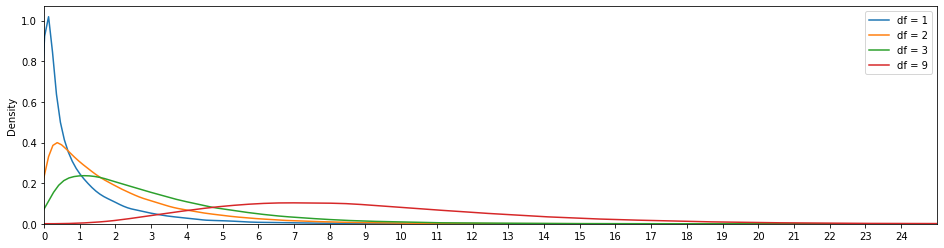

In [17]:
degrees_of_freedom = [1, 2, 3, 9]

plt.figure(figsize=(16, 4))

for df in degrees_of_freedom:
    chi2 = stats.chi2.rvs(df, size=100_000)
    chi2 = chi2[(chi2 <= 40)]
    sns.distplot(chi2, hist=False, label=f"df = {df}")

plt.legend()
plt.xlim(0, 25)
plt.xticks(np.arange(0, 25, 1));

#### Exemplo: Tipos sanguíneos

In [18]:
br_pop = 200_000_000
pp_pop = 100
br_props = np.array([.44, .41, .1, .05])
pp_props = np.array([.38, .42, .12 , .08])

bt = pd.DataFrame({
    "type": ["O", "A", "B", "AB"],
    "brazil": br_pop*br_props,
    "brazil_prop": br_props,
    "peter_pan_exp": pp_pop*br_props,
    "peter_pan_obs": pp_pop*pp_props,
})
display(bt)
    
chi2_1 = np.sum(((bt["peter_pan_obs"] - bt["peter_pan_exp"])**2)/(bt["peter_pan_exp"]))
print("Chi2:", chi2_1)

,type,brazil,brazil_prop,peter_pan_exp,peter_pan_obs
0,O,88000000.0,0.44,44.0,38.0
1,A,82000000.0,0.41,41.0,42.0
2,B,20000000.0,0.10,10.0,12.0
3,AB,10000000.0,0.05,5.0,8.0


Chi2: 3.0425720620842576


#### KEY IDEAS
- A chi-square distribution está tipicamente preocupada com contagens de categorias.
- A estatística chi-square mede quão distante esta um valor do esperado em uma hipótese nula.

### F-DISTRIBUTION
Uma tarefa comum em experimentos é testar múltiplos tratamentos entre grupos - diferentes fertilizandos em blocos diferentes de terra. Neste caso, estamos interessados em até que ponto as diferenças entre as médias dos grupos são maiores do que poderíamos esperar sob variação aleatória normal. A diferença está em medidas contínuas e não em contagens.

A F-statistic mede essa diferença e é a proporção da variabilidade entre as médias dentre os grupos pela variabilidade de cada grupo (variabilidade residual). Essa comparação é chamada de análise de variância (ANOVA).

A distribuição F é a distribuição de todos os valores que SERIAM produzidos pela permutação aleatória dos dados de grupos com médias iguais.

A F-statistic também é usada na regressão linear para comparar a variação do modelo de regressão com a variação dos dados.

#### KEY IDEAS
- A F distribution é usada em experimentos e modelos linerares envolvendo dados contínuos medidos.
- A F-statistic compara a variação devida aos fatores de interesse com a variação total.

Muitos processos produzem eventos aleatórios em determinada taxa - visitantes de um site ou carros chegando a um estacionamento a cada x minutos (eventos por tempo), typos a cada x linhas de código (eventos por espaço).

### POISSON DISTRIBUTION
Essa distribuição nos mostra a frequência de eventos por unidade de tempo ou espaço quando a taxa média desses eventos se mantém constante.

O parâmetro chave dessa distribuição é o $\lambda$ que representa a média do número de eventos que ocorre em um intervalo de tempo ou espaço específicos.

Se sabemos que a média do número de ligações ao SAC por minuto é de 2 ligações/min, podemos gerar 100.000 valores aleatórios de uma distribuição Poisson com $\lambda$ = 2 da seguinte forma:

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


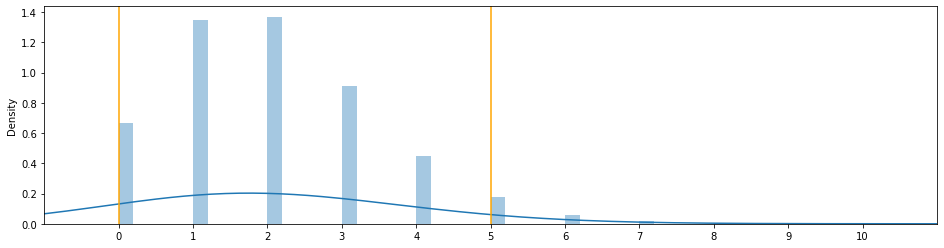

In [19]:
poisson = stats.poisson.rvs(2, size=100_000)

plt.figure(figsize=(16, 4))
sns.distplot(poisson, kde_kws={'bw':1})

plt.xticks(np.arange(np.min(poisson), np.max(poisson)+1))
plt.xlim(np.min(poisson)-1, np.max(poisson)+1)
for perc in np.percentile(poisson, [2.5, 97.5]):
    plt.axvline(perc, color="orange");

In [20]:
stats.poisson.pmf(2, 5)

0.08422433748856832

A distribuição acima nos ajuda a responder a seguinte pergunta, por exemplo: "Quantos atendentes a empresa precisa para responder com 95% de certeza todas as ligações que podem ocorrer ao SAC no período de 1min?"

### EXPONENTIAL DISTRIBUTION
Usando o mesmo parâmetro $\lambda$ da Poisson distribution, podemos modelar a distribuição dos tempo entre eventos.

### WEIBULL DISTRIBUTION
Em muitos casos, a taxa média em que os eventos ocorrem não é constante dentro de um período.

Se o período onde a taxa média varia é muito maior que o intervalo usado entre os eventos, basta dividir a análise em diferentes segmentos de tempo.

No entanto, se a taxa de evento ocorrer muda de acordo com o tempo, as distribuições acima não são mais úteis. É uma distribuição comum para estudos de falhas de. Exemplo: Falhas mecânicas, onde o risco se torna maior a medida que o tempo passa. 

Para esse caso, temos a Weibull distribution onde a taxa média pode mudar de acordo com o parâmetro $\beta$.
- $\beta > 1$: a probabilidade do evento ocorrer aumenta com o tempo
- $\beta < 1$: a probabilidade do evento ocorrer diminui com o tempo

Um segundo parâmetro é a vida característica ($\eta$), que representa o tempo em que 63,4% das unidades irá falhar.

$\beta$ é chamado de shape parameter
$\eta$ é chamado de scale parameter

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


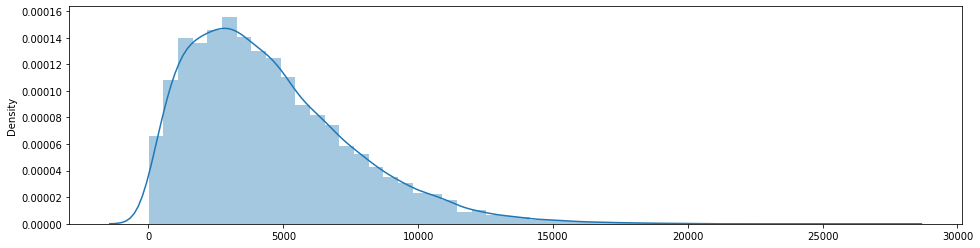

In [21]:
weilbull = stats.weibull_min.rvs(1.5, scale=5000, size=10_000)

plt.figure(figsize=(16, 4))
sns.distplot(weilbull);

### Por que entender distribuições?
Podemos apresentar um intervalo de confiança mais preciso quando utilizamos a função da distribuição em detrimento da distribuição da amostra que obtivemos. Isso porque a distribuição da nossa amostra pode estar, apenas por chance, um pouco mais tendenciosa para um valor do que estaria a curva perfeita da distribuição.

No mundo de BIG DATA, a amostra é grande o suficiente para equilibrar a distribuição e o uso do percentil da amostra ou aquele obtido na função da distribuição são semelhantes o suficientes para descartarmos, se quisermos, o uso da função da distribuição.

As distribuições também são importantes nos experimentos e testes de hipóteses.

C:\Users\itolivei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([339., 856.])

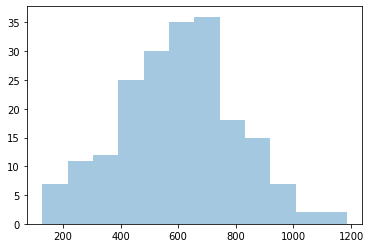

In [22]:
np.random.seed(49)
peter_pan = stats.norm.rvs(600, 200, size=200)

sns.distplot(peter_pan, kde=False)
             
np.round(np.percentile(peter_pan, [10, 90]), 0)

In [23]:
np.round(stats.t.ppf(.10, 199, 600, 200), 0), np.round(stats.t.ppf(.90, 199, 600, 200), 0)

(343.0, 857.0)

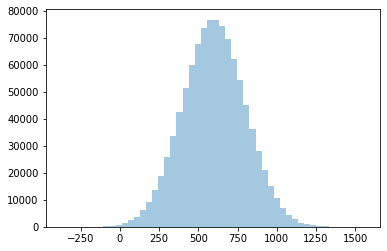

In [24]:
peter_pan = stats.norm.rvs(600, 200, size=1_000_000)

sns.distplot(peter_pan, kde=False);